In [1]:
#At first, we import python libraries that we need
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import category_encoders as ce

In [2]:
df=pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [4]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [5]:
X, y = df.drop("Drug", axis=1), df['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [18]:
X_train.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], dtype='object')

In [6]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['Sex', 'BP', 'Cholesterol'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [8]:



# --------------------------------------- Model Definition --------------------------------------- #
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# --------------------------------------- Model Training --------------------------------------- #

# Train
fit=model.fit(X_train, y_train)

# Prediction
predictions = model.predict(X_test)



In [9]:
train_pred=model.predict(X_train)

In [10]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, train_pred)))

Training-set accuracy score: 0.8429


In [11]:

print('Model accuracy score with information gain: {0:0.4f}'. format(accuracy_score(y_test, predictions)))

Model accuracy score with information gain: 0.8000


[Text(0.6666666666666666, 0.875, 'Na_to_K <= 14.829\nentropy = 1.977\nsamples = 140\nvalue = [16, 10, 13, 38, 63]\nclass = drugB'),
 Text(0.5, 0.625, 'BP <= 2.5\nentropy = 1.79\nsamples = 77\nvalue = [16, 10, 13, 38, 0]\nclass = drugA'),
 Text(0.3333333333333333, 0.375, 'BP <= 1.5\nentropy = 1.979\nsamples = 51\nvalue = [16, 10, 13, 12, 0]\nclass = drugY'),
 Text(0.16666666666666666, 0.125, 'entropy = 0.999\nsamples = 25\nvalue = [0, 0, 13, 12, 0]\nclass = drugX'),
 Text(0.5, 0.125, 'entropy = 0.961\nsamples = 26\nvalue = [16, 10, 0, 0, 0]\nclass = drugY'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 26\nvalue = [0, 0, 0, 26, 0]\nclass = drugA'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 63\nvalue = [0, 0, 0, 0, 63]\nclass = drugB')]

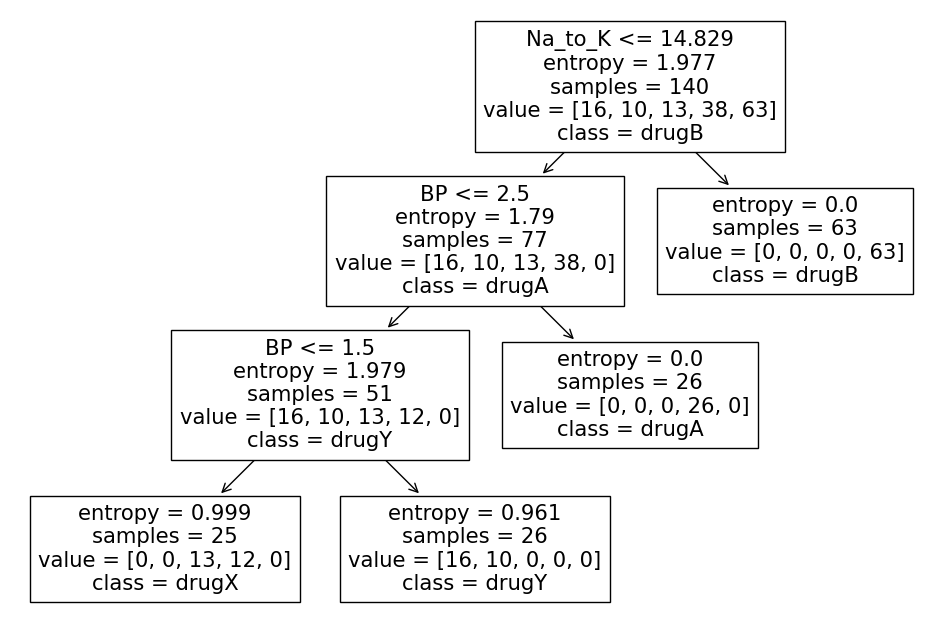

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(fit,class_names=['drugY', 'drugC', 'drugX', 'drugA', 'drugB'],feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'])